In [46]:
from ast import arg

import matplotlib.cbook as cbook
import random
import itertools
import copy
import os

from analysis_utils import*
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import defaultdict

from scipy.stats import mannwhitneyu

In [2]:
!hostname

c1b01


In [61]:
# mu = 0.1
# nets_paras = {
#     1:{'net':1, 'l':[3e-5, 2e-5, 6e-6, 4e-6]},
#     2:{'net':2, 'l':[4e-4, 1e-4, 5e-5, 5e-5]},
#     3:{'net':3, 'l':[1e-3, 2e-4, 2e-4, 8e-5]},
#     4:{'net':4, 'l':[4e-4, 9e-5, 4e-5, 2e-5]},
#     5:{'net':5, 'l':[9e-4, 2e-4, 9e-5, 6e-5]},
#     6:{'net':6, 'l':[1e-5, 4e-6, 2e-6, 9e-7]},
#     7:{'net':7, 'l':[6e-4, 2e-4, 8e-5, 7e-5]},
#     8:{'net':8, 'l':[2e-3, 9e-4, 5e-4, 4e-4]},
#     9:{'net':9, 'l':[6e-4, 5e-4, 1e-4, 6e-5]},
#     10:{'net':10, 'l':[2e-4, 1e-4, 8e-5, 4e-5]},
#     11:{'net':11, 'l':[1e-4, 1e-4, 8e-5, 4e-5]},
#     12:{'net':12, 'l':[3e-3, 2e-3, 2e-3, 2e-3]},
#     13:{'net':13, 'l':[4e-3, 9e-4, 7e-4, 6e-4]},
#     14:{'net':14, 'l':[3e-4, 3e-4, 2e-4, 1e-4]},
#     15:{'net':15, 'l':[2e-3, 2e-3, 2e-3, 1e-3]},
#     16:{'net':16, 'l':[2e-3, 2e-3, 1e-3, 1e-3]},
#     17:{'net':17, 'l':[1e-3, 4e-4, 2e-4, 9e-5]},
#     18:{'net':18, 'l':[5e-4, 2e-4, 9e-5, 9e-5]},
#     19:{'net':19, 'l':[6e-4, 1e-4, 4e-5, 4e-5]},
#     20:{'net':20, 'l':[1e-4, 5e-5, 3e-5, 2e-5]},
# }

In [67]:
# mu = 0.5
# nets_paras = {
#     1:{'net':1, 'l':[ 2e-4,  7e-5,  3e-5,  2e-5]},
#     2:{'net':2, 'l':[ 2e-3,  6e-4,  3e-4,  2e-4]},
#     3:{'net':3, 'l':[ 4e-3,  1e-3,  8e-4,  5e-4]},
#     4:{'net':4, 'l':[ 1e-3,  4e-4,  2e-4,  1e-4]},
#     5:{'net':5, 'l':[ 4e-3,  9e-4,  6e-4,  4e-4]},
#     6:{'net':6, 'l':[ 5e-5,  2e-5,  1e-5,  8e-6]},
#     7:{'net':7, 'l':[ 2e-3,  9e-4,  5e-4,  4e-4]},
#     8:{'net':8, 'l':[ 7e-3,  4e-3,  3e-3,  2e-3]},
#     9:{'net':9, 'l':[ 4e-3,  1e-3,  7e-4,  4e-4]},
#     10:{'net':10, 'l':[ 7e-4,  5e-4,  4e-4,  2e-4]},
#     11:{'net':11, 'l':[ 6e-4,  5e-4,  4e-4,  2e-4]},
#     12:{'net':12, 'l':[ 9e-3,  1e-2,  1e-2,  7e-3]},
#     13:{'net':13, 'l':[ 8e-3,  5e-3,  4e-3,  3e-3]},
#     14:{'net':14, 'l':[ 1e-3,  1e-3,  9e-4,  6e-4]},
#     15:{'net':15, 'l':[ 9e-3,  9e-3,  8e-3,  6e-3]},
#     16:{'net':16, 'l':[ 8e-3,  8e-3,  6e-3,  5e-3]},
#     17:{'net':17, 'l':[ 6e-3,  2e-3,  8e-4,  5e-4]},
#     18:{'net':18, 'l':[ 3e-3,  1e-3,  7e-4,  6e-4]},
#     19:{'net':19, 'l':[ 2e-3,  5e-4,  3e-4,  2e-4]},
#     20:{'net':20, 'l':[ 5e-4,  3e-4,  2e-4,  1e-4]},
# }

In [47]:
mu = 1
nets_paras = {
    1:{'net':1, 'l':[3e-4, 2e-4, 7e-5, 6e-5]},
    2:{'net':2, 'l':[4e-3, 1e-3, 9e-4, 7e-4]},
    3:{'net':3, 'l':[7e-3, 2e-3, 2e-3, 1e-3]},
    4:{'net':4, 'l':[5e-3, 1e-3, 5e-4, 3e-4]},
    5:{'net':5, 'l':[6e-3, 2e-3, 2e-3, 1e-3]},
    6:{'net':6, 'l':[8e-5, 4e-5, 2e-5, 2e-5]},
    7:{'net':7, 'l':[3e-3, 2e-3, 2e-3, 1e-3]},
    8:{'net':8, 'l':[1e-2, 9e-3, 5e-3, 4e-3]},
    9:{'net':9, 'l':[7e-3, 2e-3, 2e-3, 7e-4]},
    10:{'net':10, 'l':[1e-3, 1e-3, 8e-4, 5e-4]},
    11:{'net':11, 'l':[1e-3, 9e-4, 7e-4, 5e-4]},
    12:{'net':12, 'l':[2e-2, 2e-2, 2e-2, 2e-2]},
    13:{'net':13, 'l':[1e-2, 1e-2, 1e-2, 8e-3]},
    14:{'net':14, 'l':[3e-3, 2e-3, 2e-3, 2e-3]},
    15:{'net':15, 'l':[2e-2, 2e-2, 1e-2, 1e-2]},
    16:{'net':16, 'l':[2e-2, 2e-2, 1e-2, 9e-3]},
    17:{'net':17, 'l':[9e-3, 3e-3, 2e-3, 2e-3]},
    18:{'net':18, 'l':[5e-3, 2e-3, 2e-3, 9e-4]},
    19:{'net':19, 'l':[4e-3, 1e-3, 6e-4, 5e-4]},
    20:{'net':20, 'l':[1e-3, 6e-4, 4e-4, 3e-4]},
}

In [68]:
# Preprocess it into a dictionary, where the key is the network parameter 
# and the value is a result dictionary (where the key is the node number 
# and the value is the node)
Mu = int(mu*10)
if mu==0.1:
    with open(f'SIR_1_robust_range_mu{Mu}.json', 'r') as f:
        result1 = json.load(f)
        # items: n1_nu1_l3e-06_mu0.1_ini2_range
    with open(f'SIR_multi_robust_range_mu{Mu}.json', 'r') as f:
        result = json.load(f)
    result.update(result1)
elif mu==1:
    with open(f'SIR_all_robust_range_mu{Mu}.json', 'r') as f:
        result = json.load(f)
elif mu==0.5:
    with open(f'SIR_all_robust_range_mu{Mu}.json', 'r') as f:
        result = json.load(f)

resultDic = defaultdict(dict)
for item in result:
    itemsp = item.split('_')
    net = itemsp[0][1:]
    nu = itemsp[1][2:]
    l = itemsp[2][1:]
    node = itemsp[4][3:]
    resultDic[f'n{net}_nu{nu}_l{l}'][node] = result[item]

In [49]:
# mu = 1
methods = ['degree', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'neiNodesNum', 'new_neiNodeSum_1', 
                 ]
tauDic = dict()
for net in range(1,21): 
    tauDic[net] = dict()
    for nu in [1,2,3,4]:
        tauDic[net][nu] = dict()
        lThres = nets_paras[net]['l'][nu-1]
        for lratio in [0.1, 1.0, 10]:
            l = lThres*lratio
            tauDic[net][nu][l] = dict()
            for ms in methods:
                with open(f'../../MeasureValuesRanking/NodesMeasures/h_{ms}_realNet_{net}.json', "r") as h:
                    msDic = json.load(h)
                tauDic[net][nu][l][ms] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic, 'b'), 5)
            lName = int(lratio*10)
            mName = int(mu*10)
            with open(f'measures_t2_robust/h_new_precise_prob_t2_iNumn{net}_nu{nu}_l{lName}_mu{mName}_realNet_{net}.json', "r") as f:
                msDic = json.load(f)
            msDic_inum = dict()
            msDic_irnum = dict()
            for item in msDic:
                msDic_inum[item] = (1-mu)*msDic[item][0]+msDic[item][1]+msDic[item][2]
                msDic_irnum[item] = msDic[item][0]+msDic[item][1]+msDic[item][2]
            tauDic[net][nu][l]['new_t2_i'] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic_inum, 'b'), 5)
            tauDic[net][nu][l]['new_t2_ir'] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic_irnum, 'b'), 5)

            msDic_nnnrough = dict()
            with open(f'measures_t2_robust/measure_t2_robust_rough/h_new_new_new_rough_t2_iNumn{net}_nu{nu}_l{lName}_mu{mName}_realNet_{net}.json', "r") as f:
                msDic_nnnrough_raw = json.load(f)
            for item in msDic_nnnrough_raw:
                msDic_nnnrough[item] = msDic_nnnrough_raw[item][3]
            tauDic[net][nu][l]['new_t2_ir_nnnrough'] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic_nnnrough, 'b'), 5)

In [69]:
# mu != 1
methods = ['degree', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'neiNodesNum', 'new_neiNodeSum_1', 
                 ]
tauDic = dict()
for net in range(1,21): 
    tauDic[net] = dict()
    for nu in [1,2,3,4]:
        tauDic[net][nu] = dict()
        lThres = nets_paras[net]['l'][nu-1]
        for lratio in [0.1, 1.0, 10]:
            l = lThres*lratio
            tauDic[net][nu][l] = dict()
            for ms in methods:
                with open(f'../../MeasureValuesRanking/NodesMeasures/h_{ms}_realNet_{net}.json', "r") as h:
                    msDic = json.load(h)
                tauDic[net][nu][l][ms] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic, 'b'), 5)
            
            lName = int(lratio*10)
            mName = int(mu*10)
            with open(f'measures_t2_robust/h_new_precise_prob_t2_iNumn{net}_nu{nu}_l{lName}_mu{mName}_realNet_{net}.json', "r") as f:
                msDic = json.load(f)
            msDic_inum = dict()
            msDic_irnum = dict()
            for item in msDic:
                # msDic_num[item] = (1-mu)*msDic[item][0]+msDic[item][1]+msDic[item][2]
                msDic_inum[item] = (1-mu)*msDic[item][0]+msDic[item][1]+msDic[item][2]
                msDic_irnum[item] = msDic[item][0]+msDic[item][1]+msDic[item][2]
            tauDic[net][nu][l]['new_t2_i'] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic_inum, 'b'), 5)
            tauDic[net][nu][l]['new_t2_ir'] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic_irnum, 'b'), 5)
            
            with open(f'measures_t2_robust/h_new_precise_prob_t2_iNumn{net}_nu{nu}_l{lName}_mu{mName}_rescale_realNet_{net}.json', "r") as f:
                msDic_rescale = json.load(f)
            msDic_rescale_inum = dict()
            msDic_rescale_irnum = dict()
            for item in msDic_rescale:
                # msDic_rescale_num[item] = (1-mu)*msDic_rescale[item][0]+msDic_rescale[item][1]+msDic_rescale[item][2]
                msDic_rescale_inum[item] = (1-mu)*msDic_rescale[item][0]+msDic_rescale[item][1]+msDic_rescale[item][2]
                msDic_rescale_irnum[item] = msDic_rescale[item][0]+msDic_rescale[item][1]+msDic_rescale[item][2]
            tauDic[net][nu][l]['new_t2_i_rs'] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic_rescale_inum, 'b'), 5)
            tauDic[net][nu][l]['new_t2_ir_rs'] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic_rescale_irnum, 'b'), 5)

            msDic_rs_nnnrough = dict()
            with open(f'measures_t2_robust/measure_t2_robust_rough/h_new_new_new_rough_t2_iNumn{net}_nu{nu}_l{lName}_mu{mName}_rescale_realNet_{net}.json', "r") as f:
                msDic_rs_nnnrough_raw = json.load(f)
            for item in msDic_rs_nnnrough_raw:
                msDic_rs_nnnrough[item] = msDic_rs_nnnrough_raw[item][3]            
            tauDic[net][nu][l]['new_t2_ir_rs_nnnrough'] = round(caltau(resultDic[f'n{net}_nu{nu}_l{l}'], msDic_rs_nnnrough, 'b'), 5)

In [58]:
labelsshow = {'new_neiNodeSum_1':'MIS$_{t=1}^{HC}$', 
          'degree':'Hyper-degree',
          'clsBetweenness':'2-Betweenness', 
          'clsCloseness':'2-Closeness', 
          'clsKcore':'2-K-coreness', 
          'clsEigenvector':'2-Eigenvector', 
          'KMcore_g1':'Hyper-coreness-R', 
          'KMcore_gf':'Hyper-coreness-$R_w$', 
          'neiNodesNum':'2-Degree', 
          'nodeEdgeEigenvector_linear':'Eigenvector_linear', 
          'nodeEdgeEigenvector_max':'Eigenvector_linear',
          'new_precise_prob_t2_iNum_p1':'MIS-i-$t_2$', 
          'new_precise_prob_t2_irNum_p1':'MIS-ir-$t_2$', }
colors = {
          'new_neiNodeSum_1':'red' ,
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
          'new_t2_ir': (244/255, 183/255, 190/255),
          'new_t2_ir_rs': (199/255, 29/255, 49/255),
          'new_t2_ir_rough': (239/255, 147/255, 158/255),
          'new_t2_ir_rs_rough': (133/255, 19/255, 32/255),
          'new_secondNei_sum': (208/255, 206/255, 206/255),
          'new_t2_ir_nnnrough': (133/255, 19/255, 32/255) ,
          'new_t2_ir_rs_nnnrough':(133/255, 19/255, 32/255),
          }
colors_mu1 = {
          'new_neiNodeSum_1':'red',
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
          'new_t2_ir': (199/255, 29/255, 49/255),
          'new_t2_ir_nnnrough':(133/255, 19/255, 32/255),
          }

In [65]:
if mu != 1:
    methods_plt = [ 'clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum',
                    'KMcore_g1', 'KMcore_gf',
                'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'degree',
                'new_neiNodeSum_1',
                'new_t2_ir_rs',
                'new_t2_ir_rs_nnnrough'
                ]

elif mu == 1:
    methods_plt = [ 'clsBetweenness', 'clsCloseness', 'clsKcore','clsEigenvector','neiNodesNum',
                    'KMcore_g1', 'KMcore_gf',
                'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'degree',
                'new_neiNodeSum_1',
                'new_t2_ir', 
                'new_t2_ir_nnnrough',
                ]

labels = {'new_neiNodeSum_1':'MIS', 
          'degree':'Degree',
          'clsBetweenness':'Betweenness', 
          'clsCloseness':'Closeness', 
          'clsKcore':'K-coreness', 
          'clsEigenvector':'Eigenvector', 
          'KMcore_g1':'H-coreness-R', 
          'KMcore_gf':'H-coreness-$R_w$', 
          'neiNodesNum':'NNum', 
          'nodeEdgeEigenvector_linear':'NEE_linear', 
          'nodeEdgeEigenvector_max':'NEE_max',
          'new_t2_i':'MIS-i-$t_2$', 
          'new_t2_ir':'MIS-ir-$t_2$', 
          'new_t2_i_rs':'MIS-i-rs-$t_2$', 
          'new_t2_ir_rs':'MIS-ir-rs-$t_2$',     
          'new_t2_ir_rough':'MIS-ir-$t_2$-rough', 
          'new_t2_ir_rs_rough':'MIS-ir-rs-$t_2$-rough',   
          'new_t2_ir_nnnrough':'MIS-ir-$t_2$-rough-nnn',    
          'new_secondNei_sum':'new_secondNei_sum'
          }

0.5 	 1 	 0.1


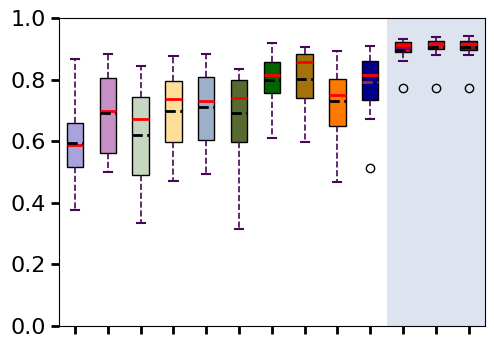

0.5 	 1 	 1


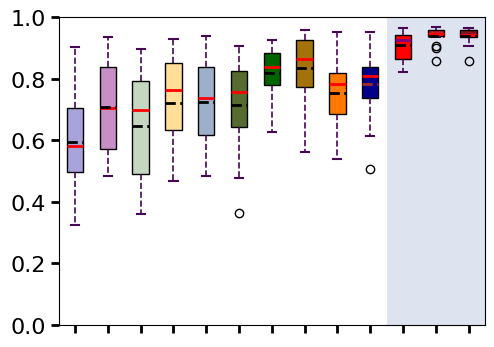

0.5 	 1 	 10


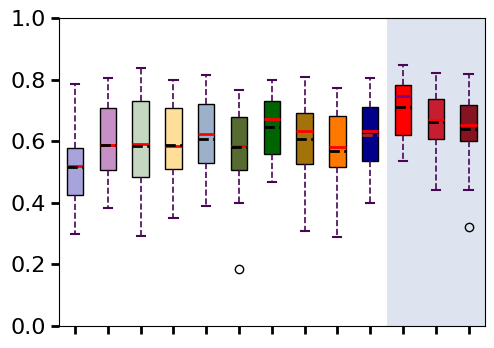

0.5 	 2 	 0.1


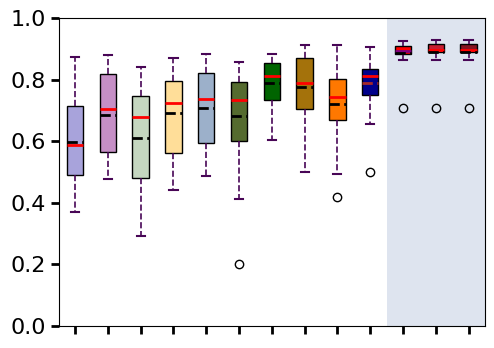

0.5 	 2 	 1


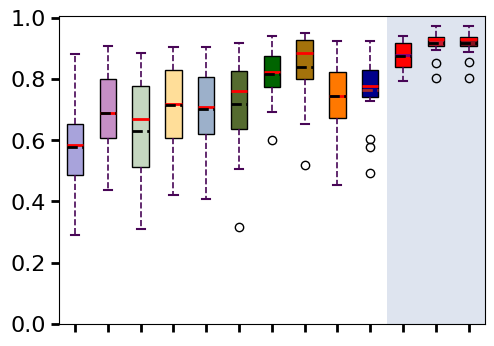

0.5 	 2 	 10


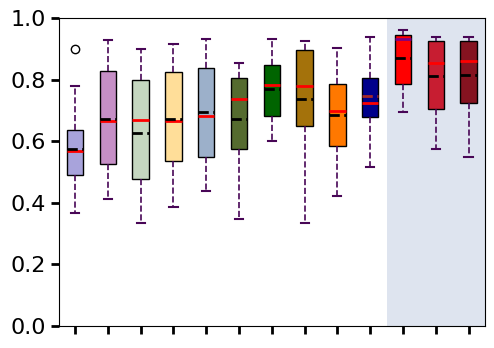

0.5 	 3 	 0.1


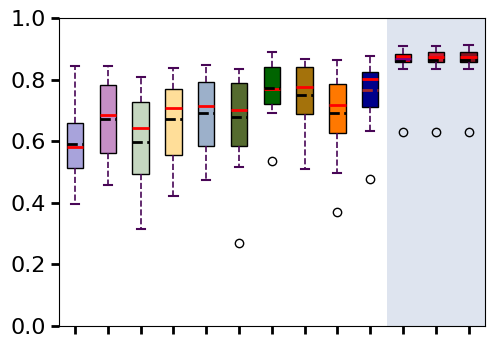

0.5 	 3 	 1


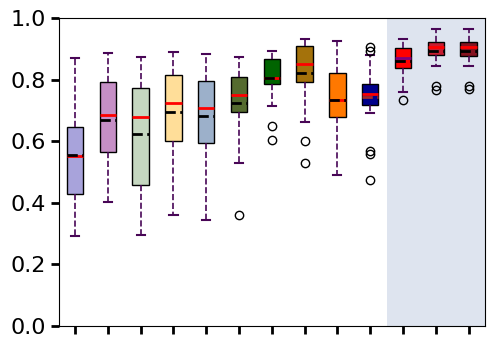

0.5 	 3 	 10


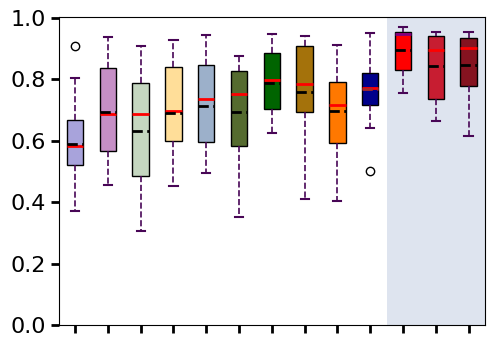

0.5 	 4 	 0.1


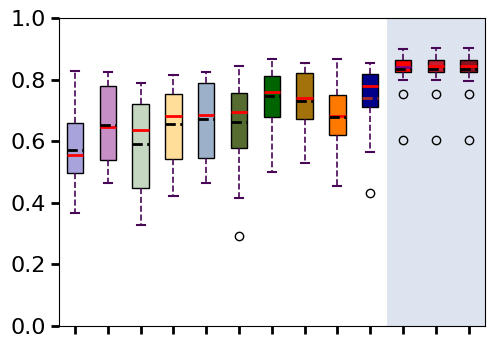

0.5 	 4 	 1


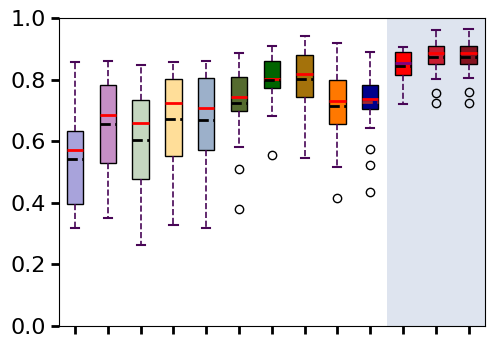

0.5 	 4 	 10


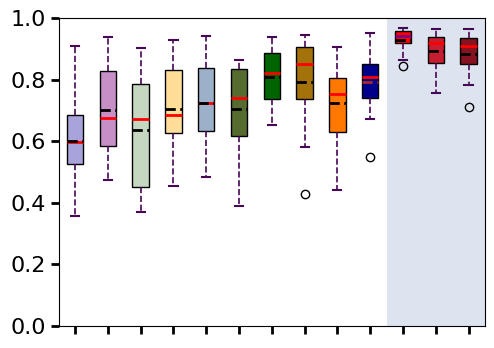

In [70]:
for nu in [1,2,3,4]:
    for ratio in [0.1,1,10]:
        data_all = []
        for ms in methods_plt:
            data = []
            for net in range(1,21):
                lThres = nets_paras[net]['l'][nu-1]
                l = lThres*ratio
                data.append(tauDic[net][nu][l][ms])
            data_all.append(data)

        plt.figure(figsize=(5.5,4))

        plt.axvspan(10.5, 13.5, color=(208/255, 217/255, 233/255), alpha=0.7, lw=0)

        f = plt.boxplot(data_all, 
                    patch_artist=True, 
                    medianprops={'linestyle': '-', 'color': 'r', 'linewidth': 2}, 
                    showmeans=True, 
                    meanline=True,
                    meanprops={  
                    'color': 'black', 'linewidth': 2},
                    whiskerprops={'linestyle': '--', 'linewidth': 1.2, 'color': '#480656'}, 
                    capprops={'linestyle': '-', 'linewidth': 1.5, 'color': '#480656'}
                    )
        # degree
        f['medians'][9].set_color('r')
        f['medians'][9].set_linestyle('-')
        f['means'][9].set_color('brown')

        # IPS1
        f['medians'][10].set_color('purple')
        f['medians'][10].set_linestyle('-')
        f['means'][10].set_color('black')
        
        # IPS2 
        f['medians'][11].set_color('red')
        f['medians'][11].set_linestyle('-')
        f['means'][11].set_color('black')
        
        # IPS2r
        f['medians'][12].set_color('red')
        f['medians'][12].set_linestyle('-')
        f['means'][12].set_color('black')
        
        if mu!=1:
            colorlst = [colors[_] for _ in methods_plt]
        else:
            colorlst = [colors_mu1[_] for _ in methods_plt]

        for patch, color in zip(f['boxes'], colorlst):
            patch.set_facecolor(color)

        plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.tick_params(axis='y', labelsize=16) 
        plt.tick_params(axis='x', labelsize=16)
        plt.tick_params(axis='x', which='major', size=6, width=2)  
        plt.tick_params(axis='y', which='major', size=6, width=2)  
        plt.gca().set_xticklabels([])
        # plt.gca().set_yticklabels([])
        muName = int(mu*10)
        lName = int(ratio*10)
        plt.savefig(f'savefig_SI/samey_box_mu{muName}_nu{nu}_l{lName}.svg', format='svg', bbox_inches='tight',dpi=300)
        print(mu,'\t',nu,'\t',ratio)
        plt.show()

1 	 1 	 0.1


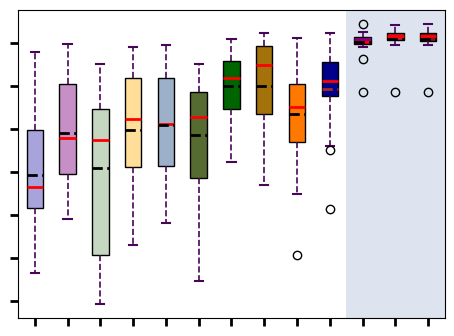

1 	 1 	 1


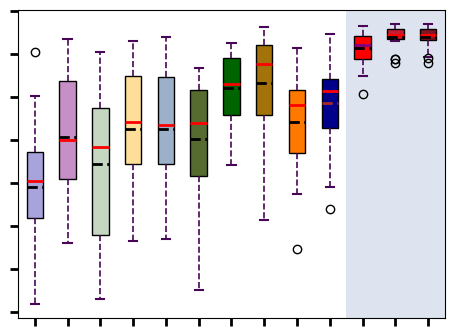

1 	 1 	 10


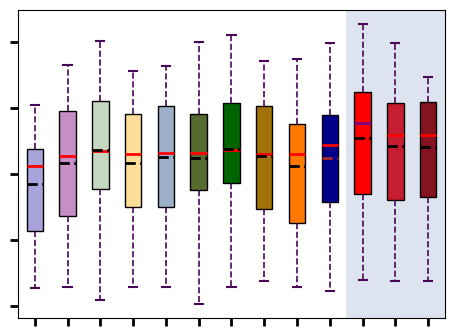

1 	 2 	 0.1


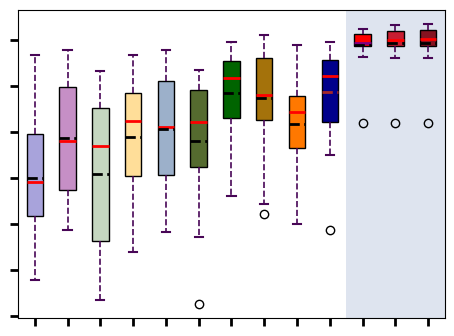

1 	 2 	 1


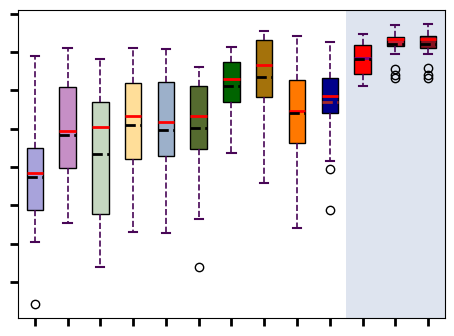

1 	 2 	 10


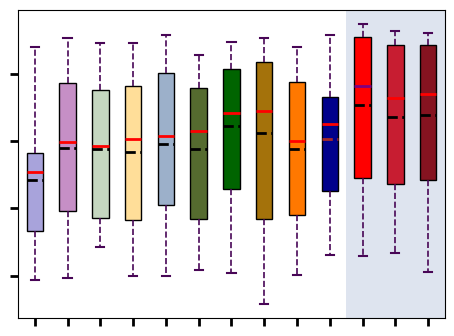

1 	 3 	 0.1


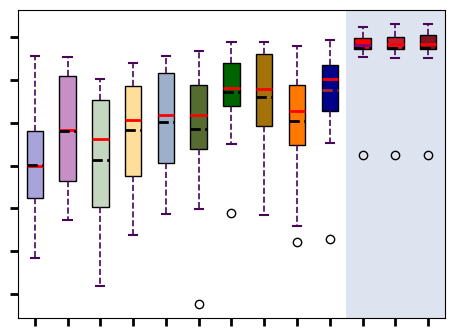

1 	 3 	 1


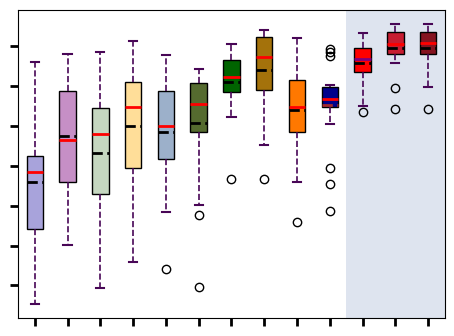

1 	 3 	 10


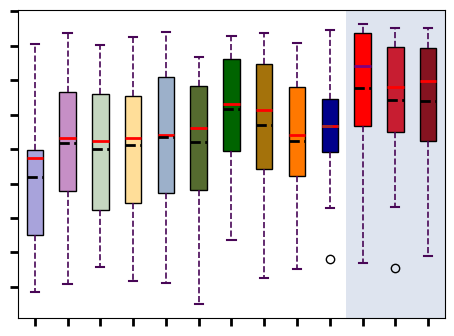

1 	 4 	 0.1


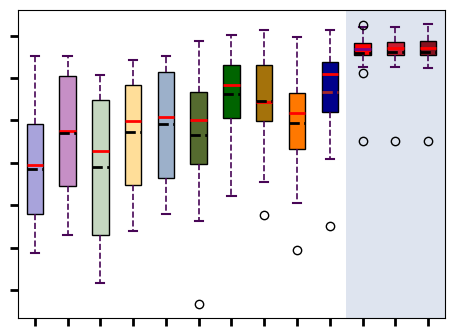

1 	 4 	 1


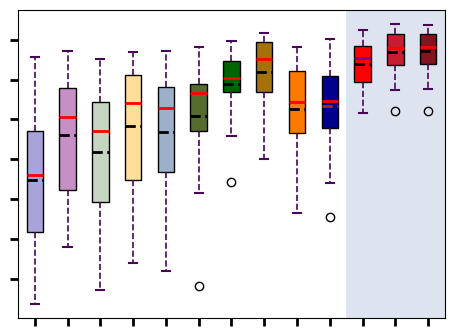

1 	 4 	 10


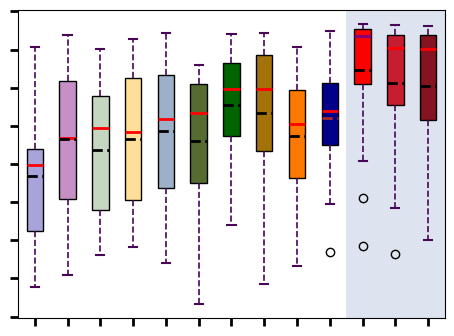

In [60]:
# main text
# only mu=1
for nu in [1,2,3,4]:
    for ratio in [0.1,1,10]:
        data_all = []
        for ms in methods_plt:
            data = []
            for net in range(1,21):
                lThres = nets_paras[net]['l'][nu-1]
                l = lThres*ratio
                data.append(tauDic[net][nu][l][ms])
            data_all.append(data)

        plt.figure(figsize=(5.5,4))

        if mu==1:
            plt.axvspan(10.5, 13.5, color=(208/255, 217/255, 233/255), alpha=0.7, lw=0)

        f = plt.boxplot(data_all, 
                    patch_artist=True,  
                    medianprops={'linestyle': '-', 'color': 'r', 'linewidth': 2}, 
                    showmeans=True, 
                    meanline=True,
                    meanprops={         
                    'color': 'black', 'linewidth': 2},
                    whiskerprops={'linestyle': '--', 'linewidth': 1.2, 'color': '#480656'}, 
                    capprops={'linestyle': '-', 'linewidth': 1.5, 'color': '#480656'}
                    )
        # degree
        f['medians'][9].set_color('r')
        f['medians'][9].set_linestyle('-')
        f['means'][9].set_color('brown')

        # IPS1
        f['medians'][10].set_color('purple')
        f['medians'][10].set_linestyle('-')
        f['means'][10].set_color('black')

        # IPS2
        f['medians'][11].set_color('red')
        f['medians'][11].set_linestyle('-')
        f['means'][11].set_color('black')
        
        # IPS2r
        f['medians'][12].set_color('red')
        f['medians'][12].set_linestyle('-')
        f['means'][12].set_color('black')
        
        if mu!=1:
            colorlst = [colors[_] for _ in methods_plt]
        else:
            colorlst = [colors_mu1[_] for _ in methods_plt]

        for patch, color in zip(f['boxes'], colorlst):
            patch.set_facecolor(color)

        if nu==1 and ratio==10:
            plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8])
        elif nu==2 and ratio==10:
            plt.yticks([0.2, 0.4, 0.6, 0.8])
        elif (nu==3 or nu==4) and ratio==10:
            plt.yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
        elif (nu==1 or nu==2) and ratio==1:
            plt.yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
        else:
            plt.yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9])
        plt.tick_params(axis='y', labelsize=16)  
        plt.tick_params(axis='x', labelsize=16)
        plt.tick_params(axis='x', which='major', size=6, width=2)  
        plt.tick_params(axis='y', which='major', size=6, width=2)  
        plt.gca().set_xticklabels([])
        plt.gca().set_yticklabels([])
        plt.savefig(f'savefig_Main/fig4_varyyticks_box_{nu}_{ratio*10}.svg', format='svg', bbox_inches='tight',dpi=300)
        print(mu,'\t',nu,'\t',ratio)
        plt.show()

In [25]:
methods_all = ['degree', 'clsBetweenness', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                'nodeEdgeEigenvector_linear', 'nodeEdgeEigenvector_max', 'neiNodesNum',
                 'new_precise_t1','new_t2_ir_rs',]
my_methods = ['new_precise_t1','new_t2_ir_rs', ]  # 'new_neiNodeSum_1', 
for ttt in [1,2]:
    print(f't{ttt}')
    for ratio in [0.1,1,10]:
        for nu in [1,2,3,4]:
            data_all = []
            for ms in methods_all:
                data = []
                for net in range(1,21):
                    lThres = nets_paras[net]['l'][nu-1]
                    l = lThres*ratio
                    data.append(tauDic[net][nu][l][ms])
                data_all.append(data)
            
            my_methods_data = [data_all[methods_all.index(method)] for method in my_methods]

            other_methods_data = []
            for i, method in enumerate(methods_all):
                if method not in my_methods:
                    other_methods_data.extend(data_all[i])

            p_values = []
            effect_sizes = []
            for my_method_data in my_methods_data:
                stat, p = mannwhitneyu(my_method_data, other_methods_data, alternative='greater')
                p_values.append((my_methods[my_methods_data.index(my_method_data)], p))
                
                # Cliff's delta
                n1, n2 = len(my_method_data), len(other_methods_data)
                U = stat
                delta = (2 * U) / (n1 * n2) - 1
                effect_sizes.append((my_methods[my_methods_data.index(my_method_data)], delta))
            print(f"{p_values[ttt-1][1]}", end='\t')
        print()
    print()

t1
3.1529892773672847e-09	1.0147016679671191e-08	5.026045044159314e-08	5.668980525502789e-06	
1.1284774481152254e-08	5.617748447691646e-08	1.8256472832419655e-07	2.843526073697044e-07	
1.4543827378862297e-08	7.052386623327867e-09	1.4158342881211229e-09	4.1252766737715124e-10	

t2
1.0322218408380457e-09	5.211689620948546e-09	4.49483509708274e-08	4.315667322684829e-06	
1.5762527213299967e-10	5.080267132413955e-10	9.93322477803693e-09	1.365242090930862e-08	
0.0012211205695468166	0.00012771518300256962	3.3900728045558056e-06	1.8978597071073426e-07	

